# Digit Classification using Log-Reg

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

#Load Dataset
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
#dir(digits)...
#'data'   - array representation of pictorial data ( 8*8 bit data represented in 1-D)
#'images' - pictorial representation of data
#'target' - numerical representation ie. 0,1,2,3,...
#'target_names' - numerical representation ie. 0,1,2,3,...

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

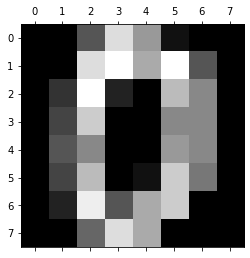

In [5]:
plt.gray()
plt.matshow(digits.images[0])

In [6]:
digits.target[0]

0

In [7]:
digits.target_names[0]

0

## Create and train logistic regression model

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

# we use digits.data (array representation of image data) and digits.target (numerical target digit) as features for train_test

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
y_predicted = model.predict(X_test)

In [11]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [12]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [13]:
#the model has predicted rightly
#to check accuracy
model.score(X_test, y_test)

0.9527777777777777

## Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 28,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  2,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  1,  0,  0, 33,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  1, 46,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  2,  1,  0,  0,  1,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 30]], dtype=int64)

Text(69.0, 0.5, 'Truth')

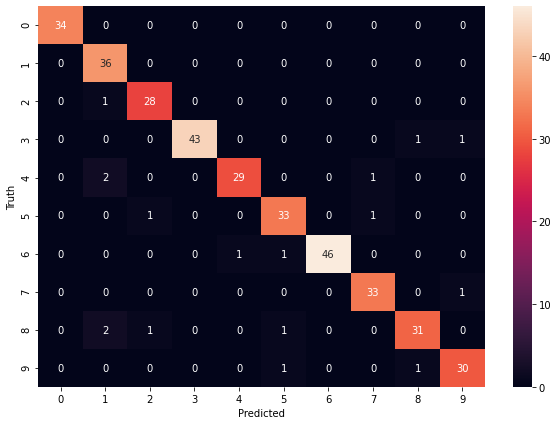

In [15]:
# to visualise confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')